In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath


In [40]:
rate  = 100.0;               # sampling rate
space = 1.0/rate;              # sampling interval
t = np.arange(0,5,space)     # time vector

w_0 = 2;                     # frequency of the signal
x = np.sin(2*np.pi*w_0*t) 

n = len(x)                   # length of the signal
k = np.arange(n)
T = n/rate
frq = k/T 


#foward fourier transform
def forward_transform(x):
    f = []                                              #create empty array
    N = len(x)
    for k in range(N):
        a = 0
        for n in range(N):
            a += x[n]*cmath.exp(-2j*cmath.pi*k*n*(1/N)) #combine sin and cos to e^()
        f.append(a)
    return f

#inverse fourier transform
def inverse_transform(f):
    r = []                                              #create empty array
    N = len(f)
    for n in range(N):
        a = 0
        for k in range(N):
            a += t[k]*cmath.exp(2j*cmath.pi*k*n*(1/N)) #combine sin and cos to e^()
        a /= N                                         #divide a by N, not recursively
        r.append(a)
    return r

In [58]:
forward = forward_transform(x)
inverse = inverse_transform(forward)

/home/jrcooper/anaconda3/envs/grizli-dev/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


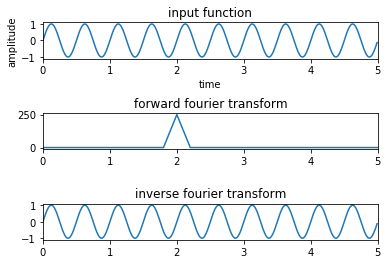

In [62]:
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlim(0,5)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('input function')

plt.subplot(3, 1, 2)
plt.plot(frq,[abs(number) for number in forward])
plt.xlim(0,5)
plt.title('forward fourier transform')


plt.subplot(3, 1, 3)
plt.plot(t,inverse)
plt.xlim(0,5)
plt.title('inverse fourier transform')


plt.subplots_adjust(hspace=1.5)
plt.show()